# scratch work

In [1]:
import jax

jax.config.update("jax_enable_x64", True)
import jax.numpy as jnp
from astropy.time import Time

from jorbit import Particle
from jorbit.utils.horizons import horizons_bulk_vector_query

In [2]:
p = Particle.from_horizons(name="534314", time=Time("2021-11-06"))
p._x

Array([17.83697886, 29.58398941,  7.42370478], dtype=float64)

In [3]:
from jorbit.utils.horizons import get_observer_positions

tess = get_observer_positions(Time("2021-11-06"), "TESS")
tess

Array([[0.709972  , 0.62942724, 0.27335336]], dtype=float64)

In [4]:
from jorbit.mpchecker.parse_jorbit_ephem import apparent_mag

apparent_mag(
    h=7.19,
    g=0.15,
    target_position=p._x,
    observer_position=tess[0]
)

Array(22.71158862, dtype=float64)

In [5]:
data = horizons_bulk_vector_query(target="274301", center="500@0", times=Time("2025-01-01"))
x0 = jnp.array([data["x"][0], data["y"][0], data["z"][0]])
v0 = jnp.array([data["vx"][0], data["vy"][0], data["vz"][0]])



In [6]:
import astropy.units as u
import numpy as np
from astropy.coordinates import SkyCoord

from jorbit.mpchecker import nearest_asteroid

start_time = Time("2021-10-12") - 4*u.hour
end_time = Time("2021-11-06") + 28*u.hour

times1 = Time(np.arange(start_time.jd, end_time.jd, 1*u.min.to(u.day)), format='jd')[::2000]

separations1, asteroids1, coord_table1, mag_table1, total_mags1 = nearest_asteroid(
    coordinate=SkyCoord(59.8202*u.deg, 12.1121*u.deg),
    times=times1,
    precomputed=None,
    radius=3*u.arcmin,
    compute_contamination=True,
    observer="TESS"
)


In [7]:
import astropy.units as u
import numpy as np
from astropy.coordinates import SkyCoord

from jorbit.mpchecker import nearest_asteroid

start_time = Time("2021-10-12") - 4*u.hour
end_time = Time("2021-11-06") + 28*u.hour

times2 = Time(np.arange(start_time.jd, end_time.jd, 1*u.min.to(u.day)), format='jd')[::1000]

separations2, asteroids2, coord_table2, mag_table2, total_mags2 = nearest_asteroid(
    coordinate=SkyCoord(59.8202*u.deg, 12.1121*u.deg),
    times=times2,
    precomputed=None,
    radius=3*u.arcmin,
    compute_contamination=True,
    observer="TESS"
)


In [8]:
c1 = coord_table1[coord_table1["name"] == "(534314) 2014 SJ349"]["coord"][0]
c2 = coord_table2[coord_table2["name"] == "(534314) 2014 SJ349"]["coord"][0]


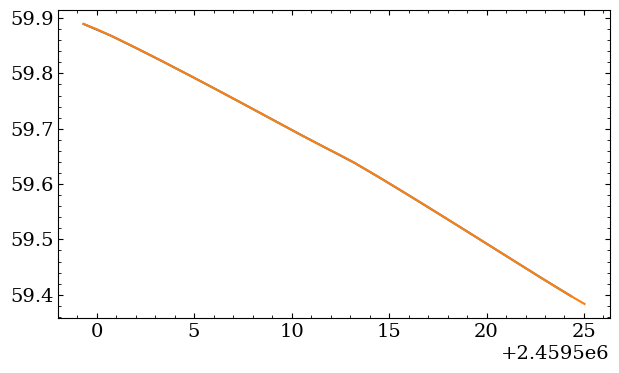

In [9]:
import matplotlib.pyplot as plt

plt.plot(times1.jd, c1.ra.deg)
plt.plot(times2.jd, c2.ra.deg)

In [10]:
len(asteroids1), len(asteroids2)

(10, 24)

In [14]:
mag_table1["mag"].min(), mag_table2["mag"].min()

(np.float64(21.139187824133135), np.float64(17.99160152062773))

In [16]:
c1.separation(c2[::2])

<Angle [9.89518050e-13, 1.03717158e-12, 1.03368093e-12, 9.85454508e-13,
        9.85932137e-13, 9.86412543e-13, 1.03776336e-12, 1.03382669e-12,
        1.03737273e-12, 1.03345509e-12, 1.03433984e-12, 1.04157763e-12,
        1.03747778e-12, 1.03705859e-12, 1.03401857e-12, 1.03361804e-12,
        1.08207595e-12, 1.04127945e-12, 1.11776853e-11] deg>

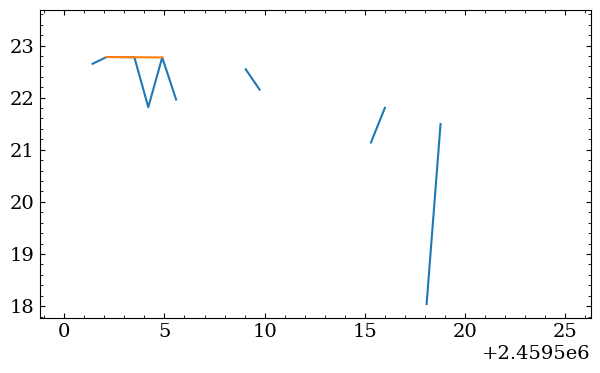

In [18]:
plt.plot(times2.jd, total_mags2)
plt.plot(times1.jd, total_mags1)


In [22]:
total_mags1, total_mags2[::2]

(Array([        inf,         inf, 22.78000246, 22.77606012, 22.77208622,
                inf,         inf,         inf,         inf,         inf,
        21.63590385,         inf, 21.80369284,         inf, 21.49498684,
                inf, 20.58210757,         inf,         inf], dtype=float64),
 Array([        inf,         inf, 22.78000246, 22.77606012, 22.77208622,
                inf,         inf, 22.54423637,         inf,         inf,
        21.63590385,         inf, 21.80369284,         inf, 21.49498684,
                inf, 20.58210757,         inf,         inf], dtype=float64))

In [5]:
import astropy.units as u
import numpy as np
from astropy.coordinates import SkyCoord

from jorbit.mpchecker import nearest_asteroid

start_time = Time("2021-10-12") - 4*u.hour
end_time = Time("2021-11-06") + 28*u.hour

times1 = Time(np.arange(start_time.jd, end_time.jd, 1*u.min.to(u.day)), format='jd')[::2000]

separations1, asteroids1, flags1 = nearest_asteroid(
    coordinate=SkyCoord(59.8202*u.deg, 12.1121*u.deg),
    times=times1,
    precomputed=None,
    radius=3*u.arcmin,
    compute_contamination=False,
)


start_time = Time("2021-10-12") - 4*u.hour
end_time = Time("2021-11-06") + 28*u.hour

times2 = Time(np.arange(start_time.jd, end_time.jd, 1*u.min.to(u.day)), format='jd')[::1000]

separations2, asteroids2, flags2 = nearest_asteroid(
    coordinate=SkyCoord(59.8202*u.deg, 12.1121*u.deg),
    times=times2,
    precomputed=None,
    radius=3*u.arcmin,
    compute_contamination=False,
)


In [7]:
flags1.sum(), flags2.sum()

(np.int64(10), np.int64(24))

In [21]:
separations1 - separations2[::2]

<Quantity [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0.] arcsec>

In [9]:
from astropy.utils.data import download_file

from jorbit.data.constants import JORBIT_EPHEM_URL_BASE

all_names = jnp.load(download_file(JORBIT_EPHEM_URL_BASE + "names.npy", cache=True))
all_names[flags1]

array(['534314', '611438', 'K09R72R', 'K10CH8D', 'K10P41G', 'K15RZ3M',
       'K19H09B', 'K19K29S', 'K19O27H', 'K21V73W'], dtype='<U7')

In [10]:
all_names[flags2]

array(['107981', '14090', '39584', '467783', '534314', '59633', '608358',
       '611438', '675701', 'K09R72R', 'K10CH8D', 'K10P41G', 'K10RA4O',
       'K12V77S', 'K15RZ3M', 'K19GE3G', 'K19H09B', 'K19K29S', 'K19O27H',
       'K20L09X', 'K21V73W', 'K21V75T', 'K21V76E', 'K21VA5O'], dtype='<U7')

In [13]:
from jorbit.mpchecker.parse_jorbit_ephem import packed_to_unpacked_designation

[packed_to_unpacked_designation(i) for i in asteroids1["Packed designation"]]

['534314',
 '611438',
 np.str_('K09R72R'),
 np.str_('K10CH8D'),
 np.str_('K10P41G'),
 np.str_('K15RZ3M'),
 np.str_('K19H09B'),
 np.str_('K19K29S'),
 np.str_('K19O27H'),
 np.str_('K21V73W')]

In [14]:
from jorbit.mpchecker.parse_jorbit_ephem import packed_to_unpacked_designation

[packed_to_unpacked_designation(i) for i in asteroids2["Packed designation"]]

[np.str_('14090'),
 np.str_('39584'),
 np.str_('59633'),
 '107981',
 '467783',
 '534314',
 '608358',
 '611438',
 '675701',
 np.str_('K09R72R'),
 np.str_('K10CH8D'),
 np.str_('K10P41G'),
 np.str_('K10RA4O'),
 np.str_('K12V77S'),
 np.str_('K15RZ3M'),
 np.str_('K19GE3G'),
 np.str_('K19H09B'),
 np.str_('K19K29S'),
 np.str_('K19O27H'),
 np.str_('K20L09X'),
 np.str_('K21V73W'),
 np.str_('K21V75T'),
 np.str_('K21V76E'),
 np.str_('K21VA5O')]